## Import Libraries

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PowerTransformer
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, accuracy_score, roc_auc_score
from sklearn.pipeline import Pipeline
import joblib

## Loading Data

In [74]:
df=pd.read_csv("/content/credit_risk_dataset.csv")

## EDA

In [75]:
df.sample(5)

,person_age,person_income,person_home_ownership,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
9479,23,41000,RENT,EDUCATION,A,4700,7.90,0,0.11,N,4
20762,26,66400,RENT,MEDICAL,A,6000,7.29,0,0.09,N,4
10482,24,43200,MORTGAGE,VENTURE,A,6350,7.49,0,0.15,N,4
5325,28,32500,RENT,MEDICAL,A,8250,7.51,0,0.25,N,10
28476,30,102000,RENT,HOMEIMPROVEMENT,A,10000,6.03,0,0.10,N,8


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32574 entries, 0 to 32573
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32574 non-null  int64  
 1   person_income               32574 non-null  int64  
 2   person_home_ownership       32574 non-null  object 
 3   loan_intent                 32574 non-null  object 
 4   loan_grade                  32574 non-null  object 
 5   loan_amnt                   32574 non-null  int64  
 6   loan_int_rate               29459 non-null  float64
 7   loan_status                 32574 non-null  int64  
 8   loan_percent_income         32574 non-null  float64
 9   cb_person_default_on_file   32574 non-null  object 
 10  cb_person_cred_hist_length  32574 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 2.7+ MB


In [77]:
df.describe()

,person_age,person_income,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32574.000000,3.257400e+04,32574.000000,29459.000000,32574.000000,32574.000000,32574.000000
mean,27.718426,6.587848e+04,9588.018051,11.011529,0.218180,0.170202,5.804108
std,6.204987,5.253194e+04,6320.249598,3.240497,0.413017,0.106755,4.053873
min,20.000000,4.000000e+03,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,12200.000000,13.470000,0.000000,0.230000,8.000000
max,94.000000,2.039784e+06,35000.000000,23.220000,1.000000,0.830000,30.000000


In [78]:
df.shape

(32574, 11)

In [79]:
df.rename(columns={
    'cb_person_default_on_file': 'historical_default',
    'cb_person_cred_hist_length': 'credit_history_length_years'
}, inplace=True)

In [80]:
df.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3115
loan_status,0
loan_percent_income,0
historical_default,0


In [81]:
df['loan_intent'].value_counts()

,count
loan_intent,
EDUCATION,6451
MEDICAL,6071
VENTURE,5716
PERSONAL,5519
DEBTCONSOLIDATION,5212
HOMEIMPROVEMENT,3605


<Axes: title={'center': 'Default Rate by Loan Grade'}, xlabel='loan_grade'>

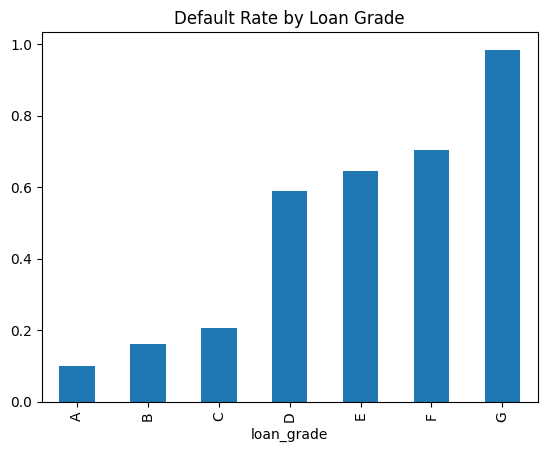

In [82]:
df.groupby('loan_grade')['loan_status'].mean().plot(kind='bar', title='Default Rate by Loan Grade')


In [57]:
cate_cols = [
    'person_home_ownership',
    'loan_intent',
    'loan_grade',
    'historical_default'
]

num_cols = [
    'person_age',
    'person_income',
    'loan_amnt',
    'loan_int_rate',
    'loan_percent_income',
    'credit_history_length_years',
]

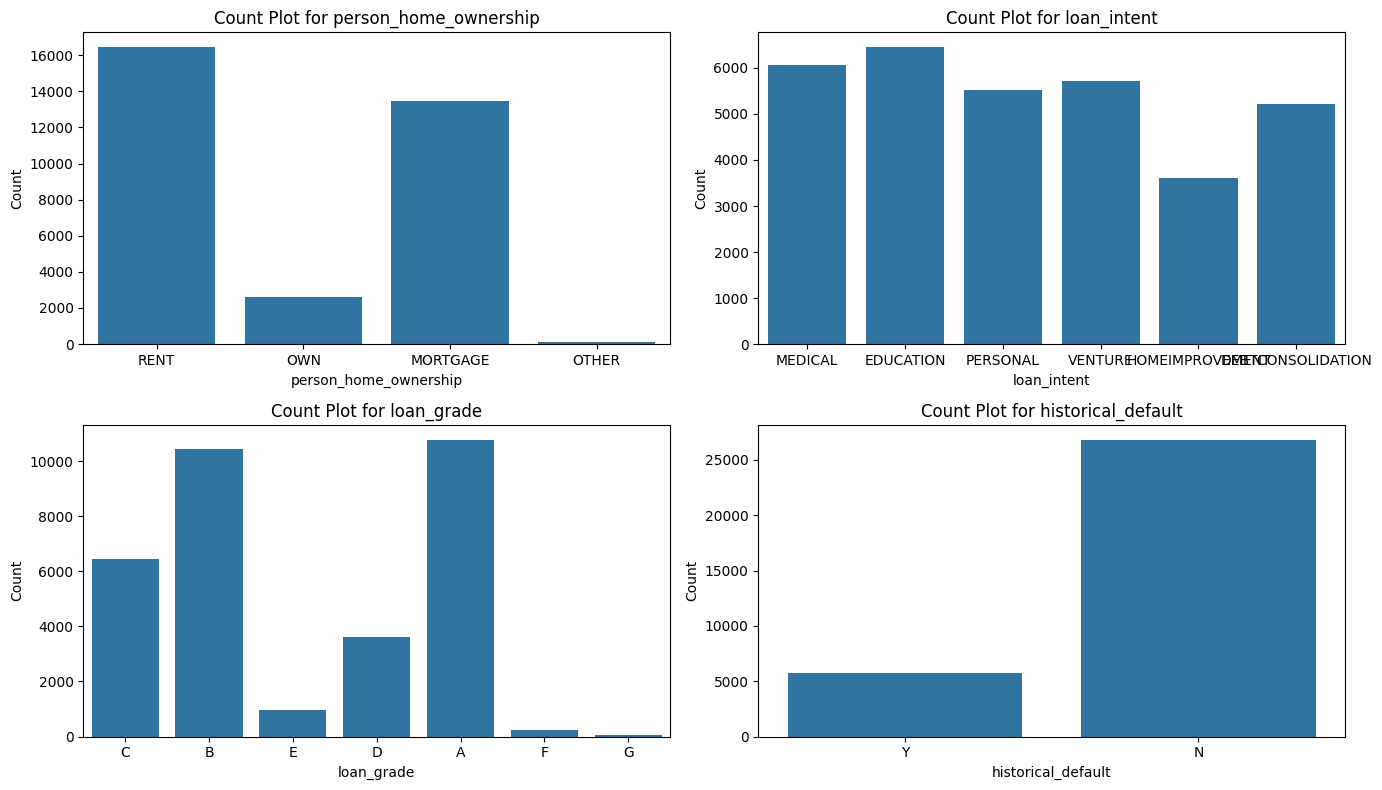

In [58]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))
axes = axes.flatten()
# Iterate over each categorical column and create a count plot
for ax, col in zip(axes, cate_cols):
    sns.countplot(data=df, x=col, ax=ax)
    ax.set_title(f'Count Plot for {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

[]

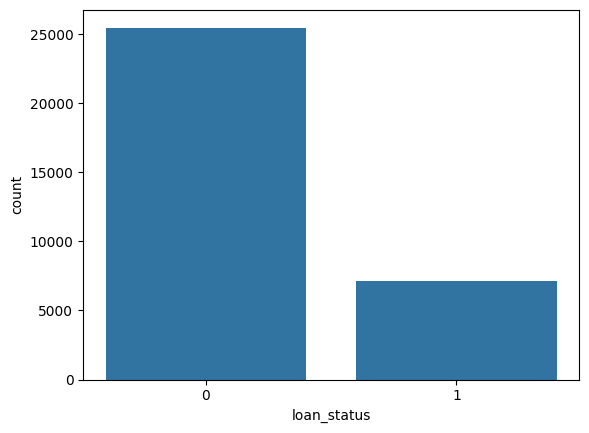

In [59]:
sns.countplot(data=df, x=df['loan_status'])
plt.plot()

In [60]:
df['loan_status'].value_counts()

,count
loan_status,
0,25467
1,7107


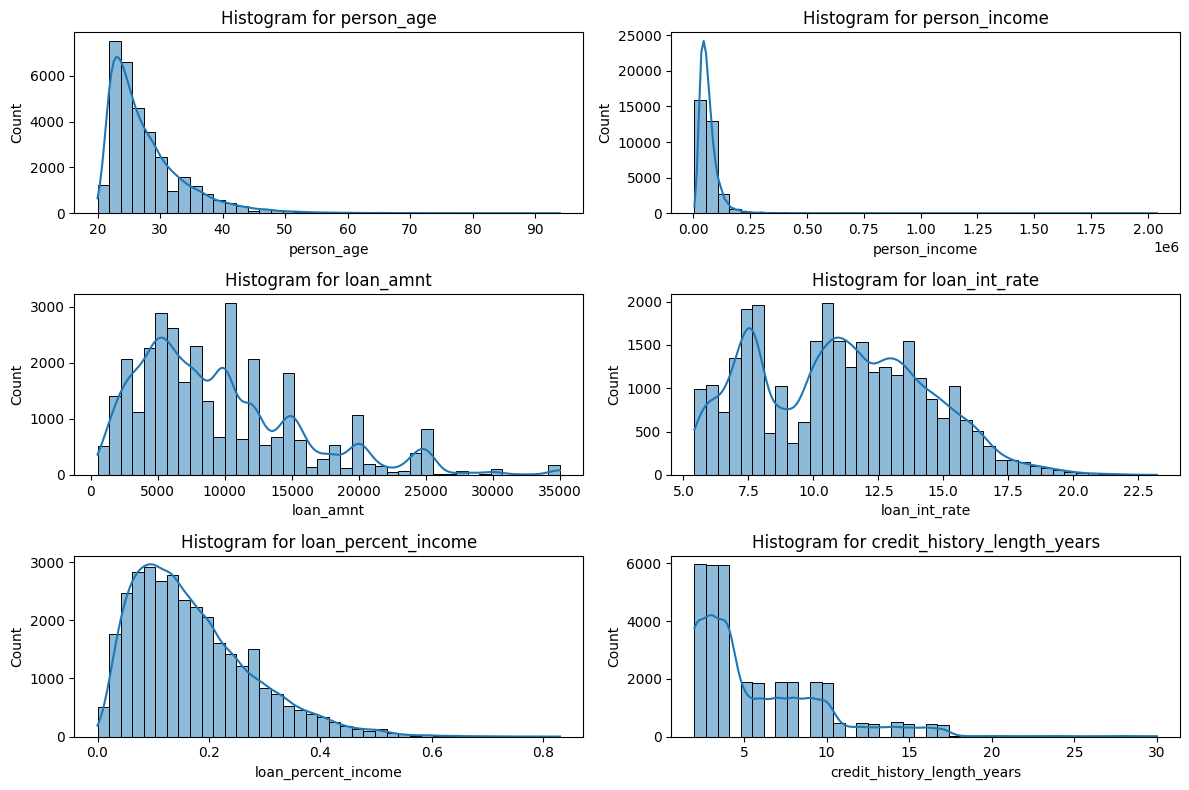

In [61]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
axes = axes.flatten()

# Iterate over each numerical column and create a histogram
for ax, col in zip(axes, num_cols):
    sns.histplot(df[col], ax=ax, bins=40, kde=True)  # KDE for kernel density estimation
    ax.set_title(f'Histogram for {col}')
    ax.set_xlabel(col)

# Adjust layout
plt.tight_layout()
plt.show()



1. **Person Age**: The distribution is right-skewed, with most ages clustered between 20 and 40. This skewness could indicate that younger individuals form the majority of the dataset.

2. **Person Income**: The income distribution is highly skewed, with a large concentration at lower income levels, suggesting that most people in this dataset earn relatively low to moderate incomes.

3. **Loan Amount**: The loan amount has a somewhat multimodal distribution, indicating that people tend to take loans of specific amounts, possibly due to predefined loan products or common loan requirements.

4. **Loan Interest Rate**: The interest rate distribution appears to have peaks, likely due to structured rate categories, with most rates falling between 7% and 12%.

5. **Loan Percent Income**: This feature shows that most people’s loan repayments are a small percentage of their income, with a majority between 0.1 and 0.4, reflecting manageable loan obligations relative to income for most borrowers.

6. **Credit History Length (Years)**: This distribution is skewed, with most credit histories under 10 years, indicating that a large portion of the dataset includes individuals relatively new to credit or young borrowers.


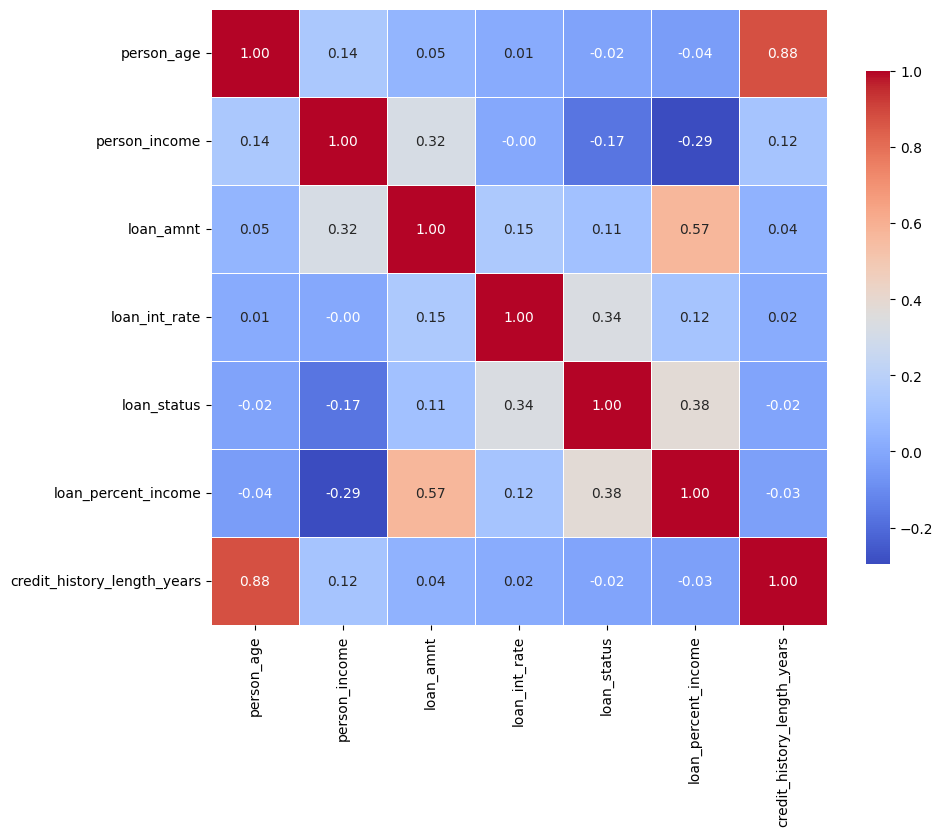

In [63]:
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix for numeric columns only
correlation_matrix = numeric_df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.show()

In [83]:
# Fill missing values with mean and median
mean_value = df['loan_int_rate'].mean()
median_value = df['loan_int_rate'].median()

print(mean_value)
print(median_value)

11.01152856512441
10.99


In [84]:
# Fill missing values with the median
df['loan_int_rate'] = df['loan_int_rate'].fillna(median_value)

## Split data into Features and Target Variable


In [85]:
X = df.drop(columns=['loan_status'])
y = df['loan_status']

## Split data into train and test sets

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Model Building

### Random Forest

In [87]:
# Define the transformers
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = Pipeline(steps=[
    ('log_transform', PowerTransformer(method='yeo-johnson', standardize=False)),  # Apply skew correction
    ('scaler', StandardScaler())  # Standardize features
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, cate_cols),
        ('num', numerical_transformer, num_cols)
    ],
    remainder='drop'
)

# Computing weights
class_weights = {0: 1.0, 1: (25467 / 7107)}

# Create the model pipeline
rf_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('rf_classifier', RandomForestClassifier(class_weight=class_weights, random_state=42))
])

# Fit the model pipeline on training data
rf_model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['person_home_ownership',
                                                   'loan_intent', 'loan_grade',
                                                   'historical_default']),
                                                 ('num',
                                                  Pipeline(steps=[('log_transform',
                                                                   PowerTransformer(standardize=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['person_age',
                                                   'person_income', 'loan_amnt',
                                                   'loan_int_rate',
                                                   'loan_percent_income',
                                                   'credit_history_length_years'])])),
                ('rf_classifier',
                 RandomForestClassifier(class_weight={0: 1.0,
                                                      1: 3.583368509919797},
                                        random_state=42))])

In [88]:
# Predictions on test data
y_pred = rf_model_pipeline.predict(X_test)
y_pred_proba = rf_model_pipeline.predict_proba(X_test)[:, 1]

In [89]:
# Model evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      5094
           1       0.93      0.69      0.79      1421

    accuracy                           0.92      6515
   macro avg       0.92      0.84      0.87      6515
weighted avg       0.92      0.92      0.92      6515



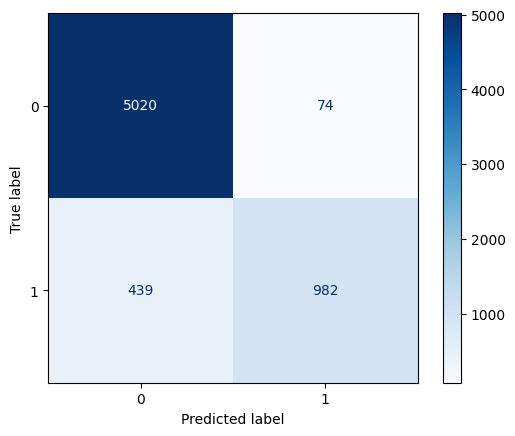

In [90]:
# Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(cmap="Blues")
plt.show()

AUC-ROC Score: 0.93


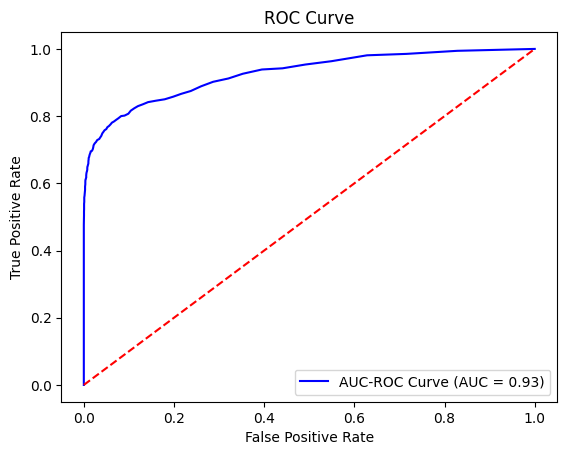

In [91]:
# AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC Score: {auc_roc:.2f}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='blue', label=f"AUC-ROC Curve (AUC = {auc_roc:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

### Logistic Regrssion

In [92]:
# Define the transformers
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = Pipeline(steps=[
    ('log_transform', PowerTransformer(method='yeo-johnson', standardize=False)),  # Apply skew correction
    ('scaler', StandardScaler())  # Standardize features
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, cate_cols),
        ('num', numerical_transformer, num_cols)
    ],
    remainder='drop'
)

# Computing weights
class_weights = {0: 1.0, 1: 3}

# Create the model pipeline
lr_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lr_classifier', LogisticRegression(class_weight=class_weights, random_state=42))
])

# Fit the model pipeline on training data
lr_model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['person_home_ownership',
                                                   'loan_intent', 'loan_grade',
                                                   'historical_default']),
                                                 ('num',
                                                  Pipeline(steps=[('log_transform',
                                                                   PowerTransformer(standardize=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['person_age',
                                                   'person_income', 'loan_amnt',
                                                   'loan_int_rate',
                                                   'loan_percent_income',
                                                   'credit_history_length_years'])])),
                ('lr_classifier',
                 LogisticRegression(class_weight={0: 1.0, 1: 3},
                                    random_state=42))])

In [93]:
# Predictions on test data
y_pred = lr_model_pipeline.predict(X_test)
y_pred_proba = lr_model_pipeline.predict_proba(X_test)[:, 1]

In [94]:
# Model evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.83      0.88      5094
           1       0.56      0.77      0.65      1421

    accuracy                           0.82      6515
   macro avg       0.74      0.80      0.76      6515
weighted avg       0.85      0.82      0.83      6515



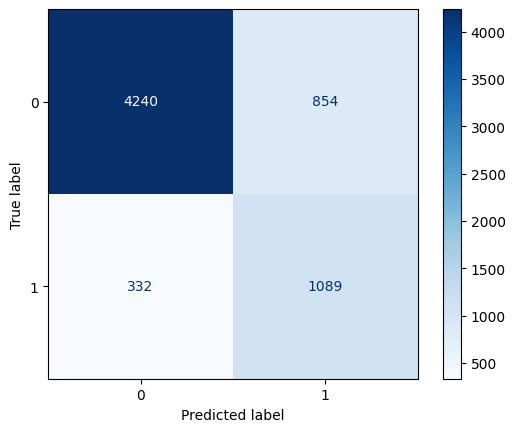

In [95]:
# Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(cmap="Blues")
plt.show()

AUC-ROC Score: 0.88


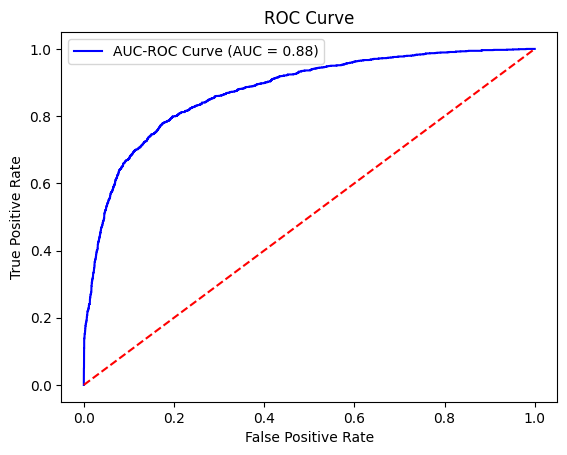

In [96]:
# AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC Score: {auc_roc:.2f}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='blue', label=f"AUC-ROC Curve (AUC = {auc_roc:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


### Voting Classifer

In [97]:
# Define Logistic Regression model pipeline
lr_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lr_classifier', LogisticRegression(class_weight='balanced', random_state=42))
])

# Define Random Forest model pipeline
rf_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('rf_classifier', RandomForestClassifier(class_weight='balanced', random_state=42))
])

# Create an ensemble classifier with voting
voting_classifier = VotingClassifier(estimators=[
    ('lr', lr_model_pipeline),
    ('rf', rf_model_pipeline)
], voting='soft')

# Fit the ensemble model on the training data
voting_classifier.fit(X_train, y_train)


VotingClassifier(estimators=[('lr',
                              Pipeline(steps=[('preprocessor',
                                               ColumnTransformer(transformers=[('cat',
                                                                                OneHotEncoder(handle_unknown='ignore'),
                                                                                ['person_home_ownership',
                                                                                 'loan_intent',
                                                                                 'loan_grade',
                                                                                 'historical_default']),
                                                                               ('num',
                                                                                Pipeline(steps=[('log_transform',
                                                                                                 PowerTransformer(standardize=False)),
                                                                                                ('scaler',
                                                                                                 StandardScaler())]),
                                                                                ['person_age',
                                                                                 'person_i...
                                                                                 'loan_grade',
                                                                                 'historical_default']),
                                                                               ('num',
                                                                                Pipeline(steps=[('log_transform',
                                                                                                 PowerTransformer(standardize=False)),
                                                                                                ('scaler',
                                                                                                 StandardScaler())]),
                                                                                ['person_age',
                                                                                 'person_income',
                                                                                 'loan_amnt',
                                                                                 'loan_int_rate',
                                                                                 'loan_percent_income',
                                                                                 'credit_history_length_years'])])),
                                              ('rf_classifier',
                                               RandomForestClassifier(class_weight='balanced',
                                                                      random_state=42))]))],
                 voting='soft')

In [98]:
# Predictions on test data
y_pred = voting_classifier.predict(X_test)
y_pred_proba = voting_classifier.predict_proba(X_test)[:, 1]

In [99]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      5094
           1       0.81      0.76      0.78      1421

    accuracy                           0.91      6515
   macro avg       0.87      0.85      0.86      6515
weighted avg       0.91      0.91      0.91      6515



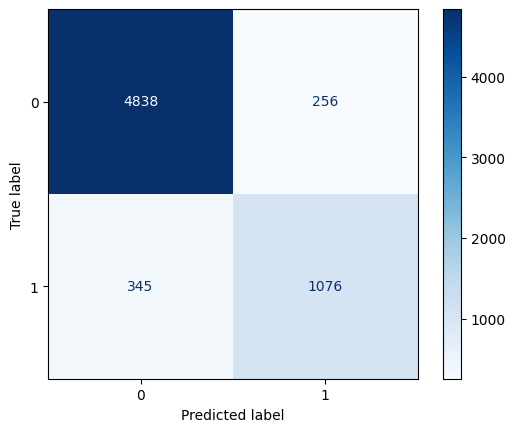

In [102]:
# Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(cmap="Blues")
plt.show()

AUC-ROC Score: 0.92


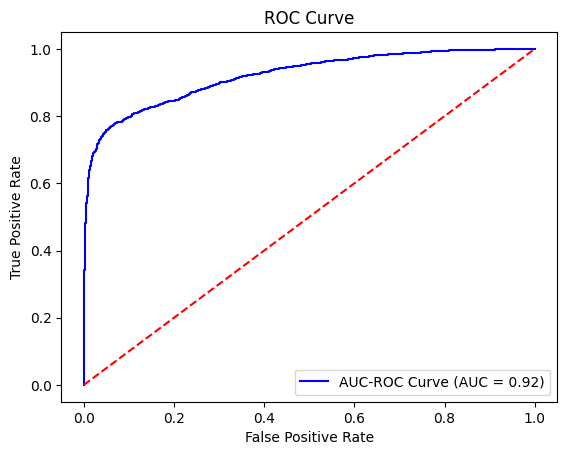

In [103]:
# AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC Score: {auc_roc:.2f}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='blue', label=f"AUC-ROC Curve (AUC = {auc_roc:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

## Saving Model

In [104]:
# Save the model (e.g., the pipeline that includes preprocessor and classifier)
joblib.dump(voting_classifier, 'voting_model.pkl')

['voting_model.pkl']

## Conclusion
Here are the key steps and results from our analysis:

### Data Preprocessing
- During data preprocessing, we encountered missing values in the `loan_int_rate` column. To handle these, we used the median value of the column to impute missing entries, as median imputation is less affected by outliers and retains the central tendency of the data.

### Modeling Approaches
- We employed two primary classification models to predict credit risk: **Random Forest** and **Logistic Regression**.
    - **Random Forest**: This ensemble model, known for its robustness and ability to handle complex patterns, contributed to high predictive accuracy and managed feature importance well.
    - **Logistic Regression**: This model provided a linear, interpretable approach to the classification, making it easier to understand feature impacts on predictions.
    
- To leverage the strengths of both models, we combined them using a **Voting Classifier**. This ensemble method combines predictions from both models, using a majority voting system to make the final decision. This approach resulted in a balanced performance, achieving an **overall accuracy of 0.91**.

### Evaluation and Performance Metrics
- The Voting Classifier helped balance **false positives** (predicting high risk when the applicant is not risky) and **false negatives** (predicting low risk when the applicant is actually risky). By using this combined model, we reduced the likelihood of false negatives, which is crucial in credit risk modeling since falsely classifying high-risk applicants as low-risk could lead to financial losses.
  
- Additionally, the Voting Classifier struck a balance between precision and recall, optimizing for both risk identification and minimizing the misclassification costs.

In conclusion, the combination of Random Forest and Logistic Regression via the Voting Classifier provided a balanced and accurate approach to predicting credit risk, with an accuracy of 0.91. This model can serve as a reliable foundation for identifying potential credit risks in similar datasets.
